In [2]:
# Various modules
import data_insights
import pandas as pd
import data_processing
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Grab the data
energy_dataset = pd.read_csv('../../data/energy_dataset.csv')
weather_features = pd.read_csv('../../data/weather_features.csv')

<h1>Data Format Analysis</h1>

<p>This sections explores the data formats for the models we are about to explore</p>

In [4]:
energy_dataset.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
weather_features.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [6]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [7]:
weather_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

<h1>Getting the Complete Feature Set</h1>

This section focuses on extracting the necessary data that is needed from the data, such as the training set, test set, and dataframe that contains all variables. These are listed below for this project.

The target variables are:

<ul>
    <li>Total Actual Load</li>
    <li>Price</li>
</ul>

The attributes that are used to generate the target variables are listed below. They include the values listed below

<ul>
    <li>Time</li>
    <li>Temp</li>
    <li>Pressure</li>
    <li>Humidity</li>
    <li>Wind Speed</li>
    <li>Wind Deg.</li>
    <li>1h Rain</li>
    <li>3h rain</li>
    <li>3h snow</li>
    <li>All clouds</li>
</ul>

Note that we use a MinMax Normalizer on all models.

<h3>Extracting the Data</h3>

We extract the necessary data from our datasets and combine them into a single dataset for analysis. Note that any datasets that contain missing attribute values are filled with the median value for that attribute.

In [8]:
# Get the necessary column values from the data

# Energy attributes
energy_categories = ["time" ,"total load actual", "price actual"]
energy_attribs = data_insights.get_attribs(energy_dataset, energy_categories)

# Weather attributes
weather_categories= ["dt_iso", "temp", "pressure", "humidity", "wind_speed", "wind_deg", "rain_1h", "rain_3h", "snow_3h", "clouds_all"]
weather_attribs = data_insights.get_attribs(weather_features, weather_categories)

In [9]:
# Create a pipeline that allows for us to extract the data
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# The following pipeline will clean our data based on a particular period
def aggregate_pipeline(data, period, dates_col="time"):
    combine_pipeline = Pipeline([
        ("daily_stats", data_processing.StatsPeriod(period=period, drop=False, dates_col=dates_col, df=True)),
    ])

    data_combined = combine_pipeline.fit_transform(data)

    # Data we will later need to reconstruct dataframe
    indices =  data_combined.index
    columns = data_combined.columns

    # Second pipeline - scales and fills in the data
    scale_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("minmax", MinMaxScaler())
    ])

    data = scale_pipeline.fit_transform(data_combined)
    return pd.DataFrame(data, columns=columns, index=indices)

In [10]:
# Energy datasets
energy_daily = aggregate_pipeline(energy_attribs, "D")
energy_month = aggregate_pipeline(energy_attribs, "M")
energy_hour = aggregate_pipeline(energy_attribs, "H")

# Weather datasets
weather_daily = aggregate_pipeline(weather_attribs, "D", dates_col="dt_iso")
weather_month = aggregate_pipeline(weather_attribs, "M", dates_col="dt_iso")
weather_hour = aggregate_pipeline(weather_attribs, "H", dates_col="dt_iso")

In [11]:
# Combine the dataframes (make a copy, no views)
hour = weather_hour.join(energy_hour)
daily = weather_daily.join(energy_daily)
month = weather_month.join(energy_month)

In [12]:
# Get the test and training sets now
from sklearn.model_selection import train_test_split

# Update the categories arrays (as time values are now indices)
weather_categories.remove("dt_iso")
energy_categories.remove("time")

# Get all training and test sets
X_hour_train, X_hour_test, y_hour_train, y_hour_test = train_test_split(hour[weather_categories], hour[energy_categories], test_size=0.2, random_state=42)
X_daily_train, X_daily_test, y_daily_train, y_daily_test = train_test_split(daily[weather_categories], daily[energy_categories],
                                                                            test_size=0.2, random_state=42)
X_month_train, X_month_test, y_month_train, y_month_test = train_test_split(month[weather_categories], month[energy_categories],
                                                                            test_size=0.2, random_state=42)

<h3>Data Analysis and Insights</h3>

<p>This portion focuses on using data analysis and insights to get an idea of the overall data from the training set</p>

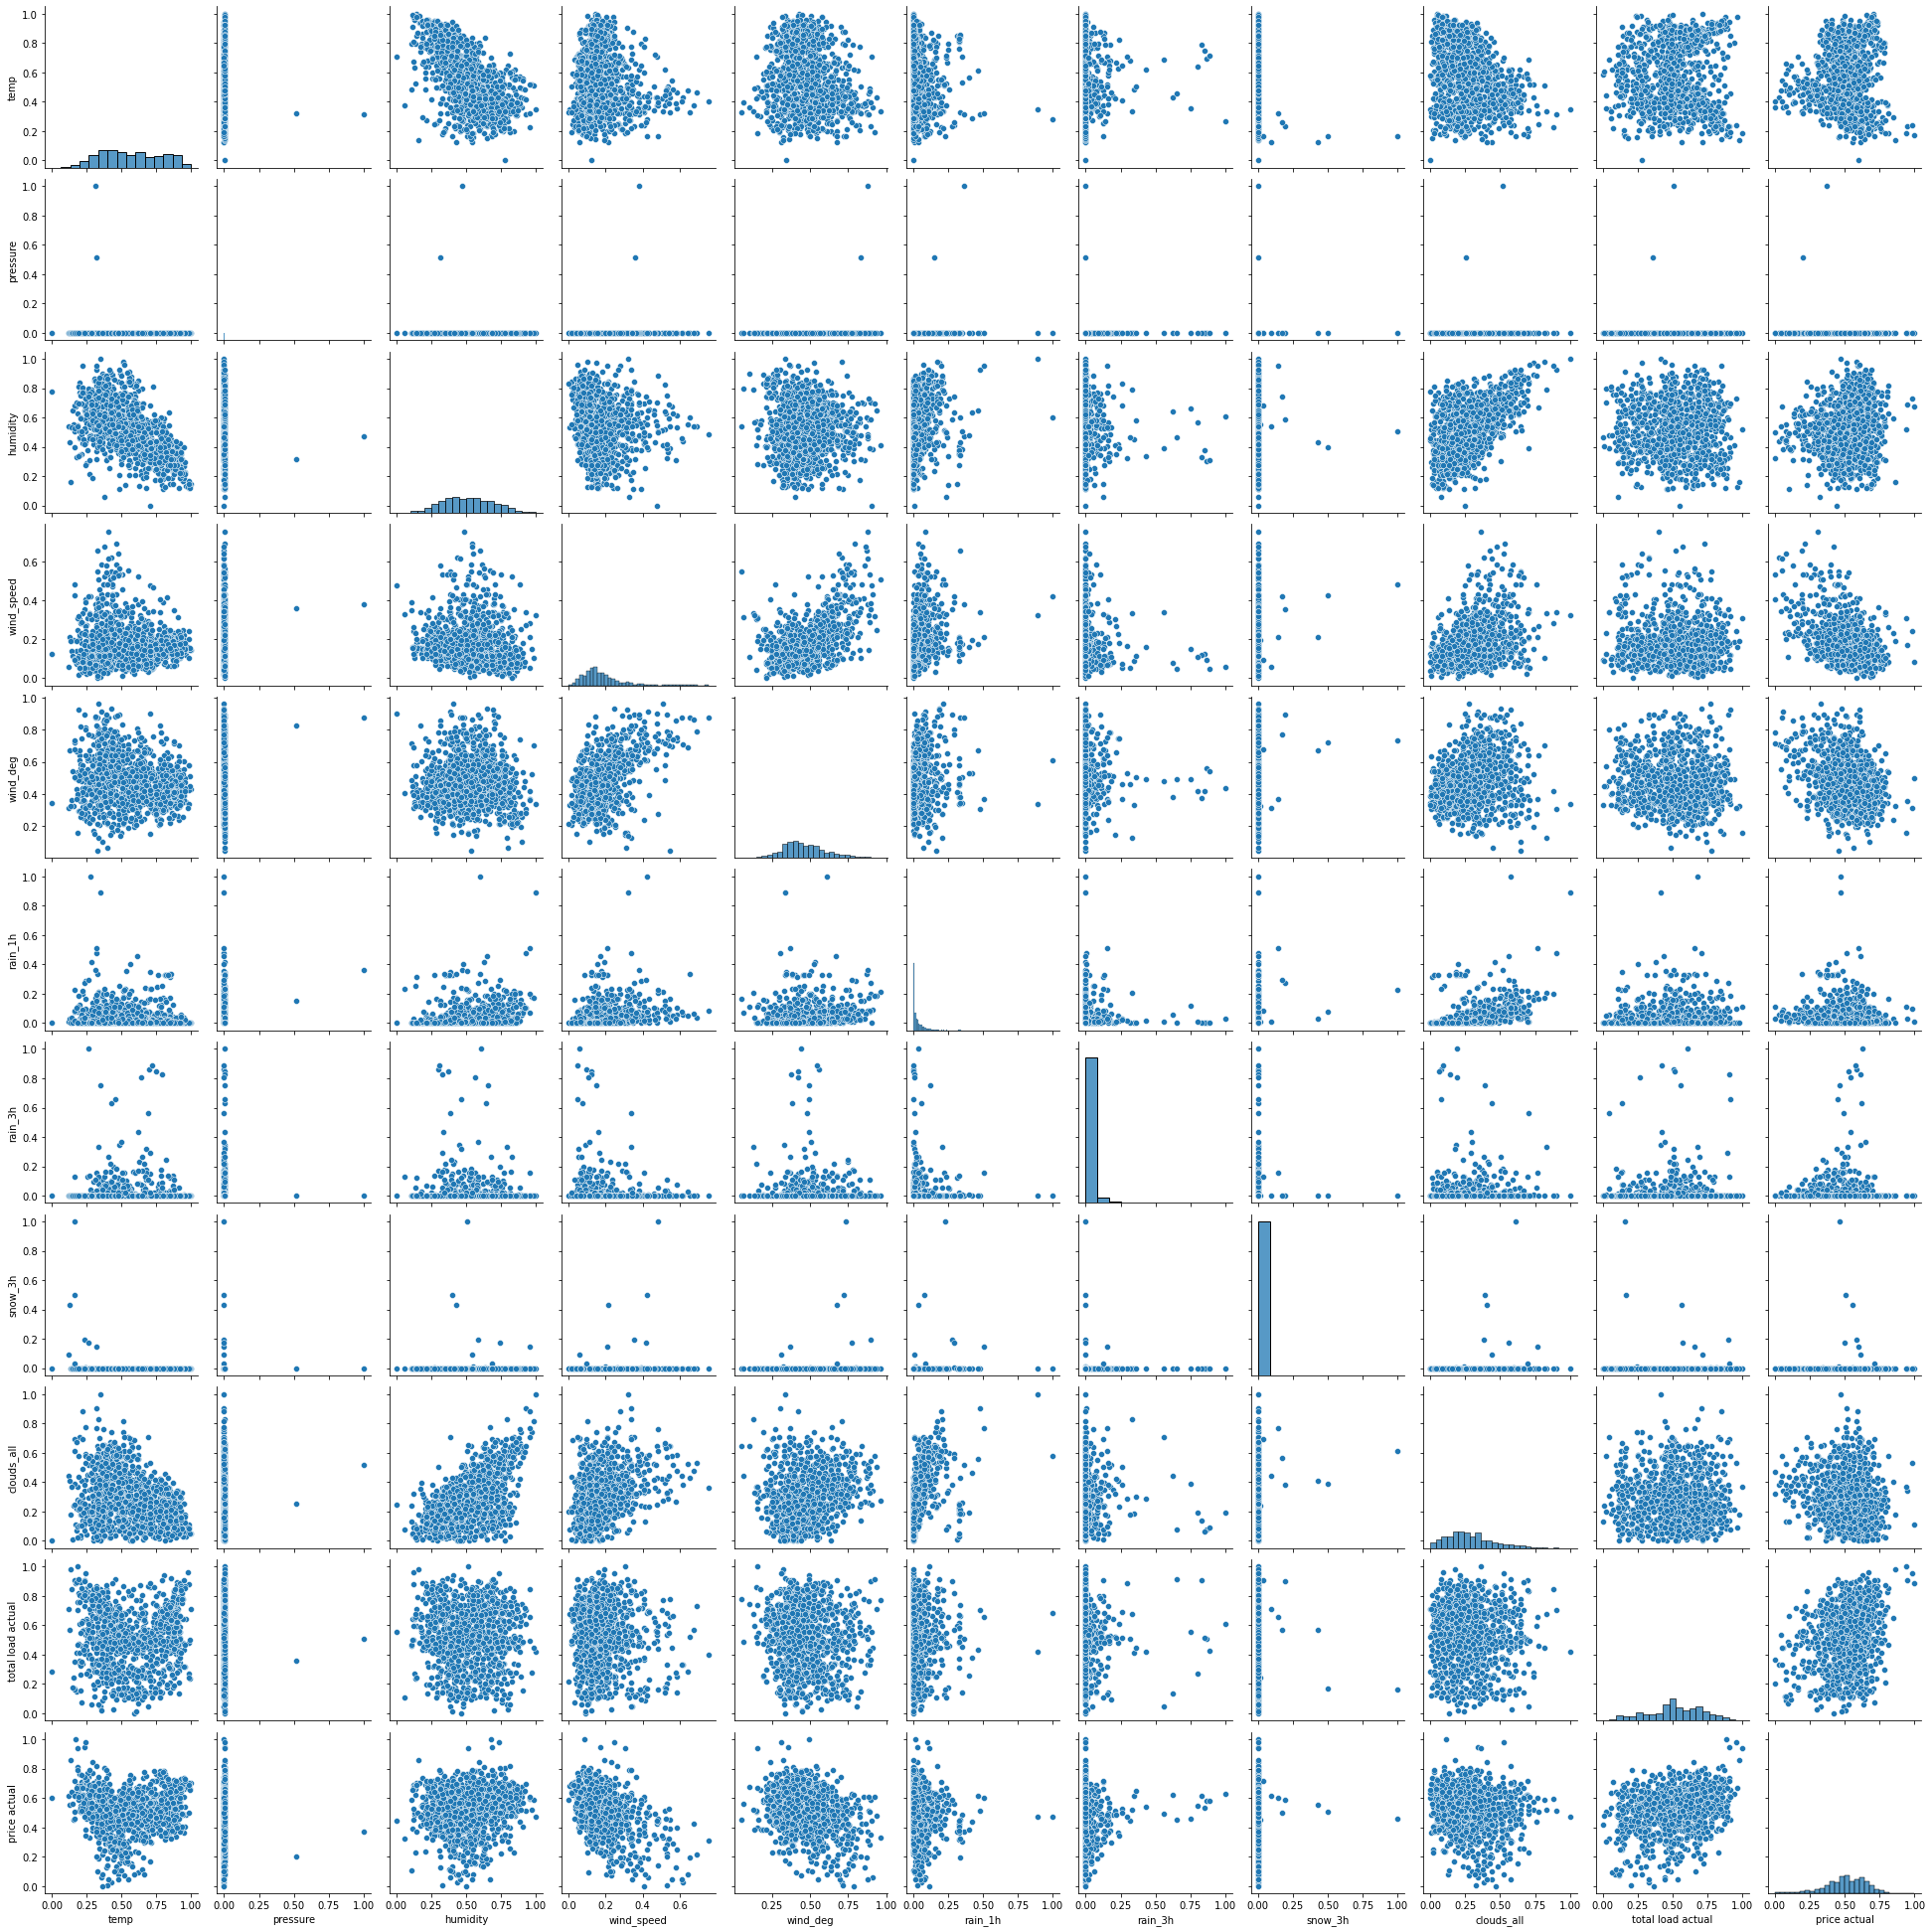

In [16]:
data_insights.create_pairplot(X_daily_train.join(y_daily_train))

<AxesSubplot:>

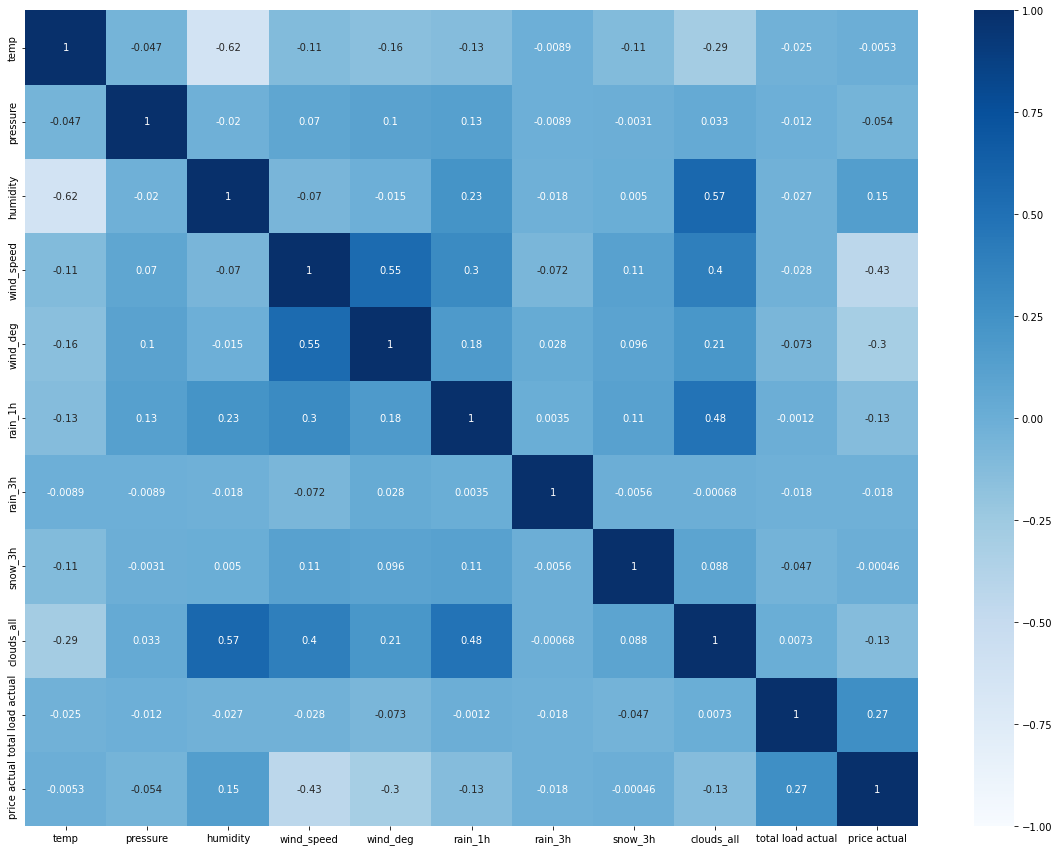

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(X_daily_train.join(y_daily_train).corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")